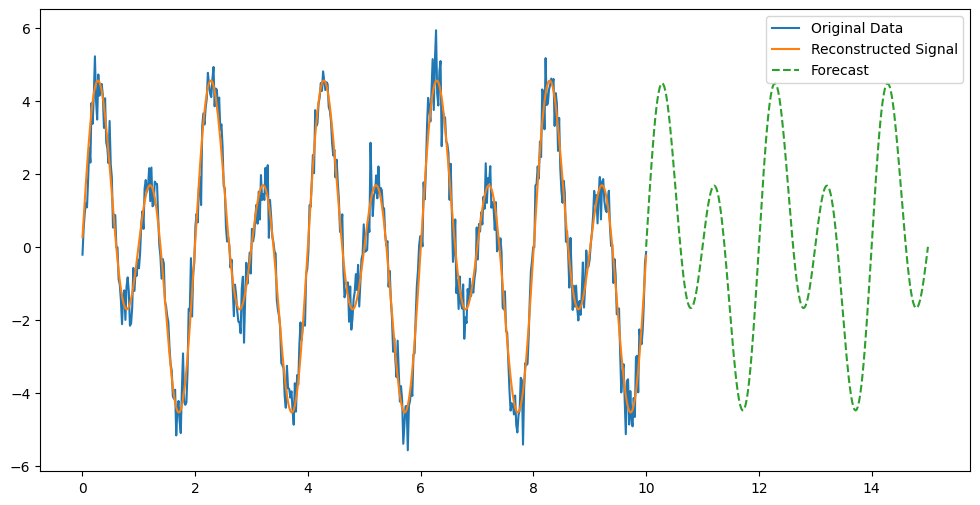

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft, ifft

# Generate synthetic data
t = np.linspace(0, 10, 500)
data = 3 * np.sin(2 * np.pi * 1 * t) + 2 * np.sin(2 * np.pi * 0.5 * t) + np.random.normal(0, 0.5, t.shape)

# Apply Discrete Fourier Transform - convert time domain to frequency domain
fft_result = fft(data)
frequencies = np.fft.fftfreq(len(data), d=(t[1] - t[0]))

# Select dominant frequencies
magnitude = np.abs(fft_result)
threshold = 0.1 * max(magnitude)
filtered_fft = np.where(magnitude > threshold, fft_result, 0)

# Reconstruct the signal - Inverse Discrete Fourier Transform: convert frequency domain to time domain
reconstructed_signal = ifft(filtered_fft).real

# Forecast future values
future_t = np.linspace(10, 15, 250)  # Future time points
predicted_signal = 3 * np.sin(2 * np.pi * 1 * future_t) + 2 * np.sin(2 * np.pi * 0.5 * future_t)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(t, data, label="Original Data")
plt.plot(t, reconstructed_signal, label="Reconstructed Signal")
plt.plot(future_t, predicted_signal, label="Forecast", linestyle="dashed")
plt.legend()
plt.show()
